<a href="https://colab.research.google.com/github/loisstetson/Project-4-Meteorite-Landings/blob/main/Cost_of_Living.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline


# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/loisstetson/Project-4-Meteorite-Landings/main/cost_of_living_us.csv')

# Display the first few rows of the dataset
data

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062
4,1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31425,3171,WY,False,"Weston County, WY",Weston County,2p0c,8316.00000,6010.65672,14790.36240,14466.55920,5191.11288,0.0000,6640.77324,55415.4672,80177.656250
31426,3171,WY,False,"Weston County, WY",Weston County,2p1c,10956.00000,7480.86696,15611.58600,18086.24160,6680.40384,8675.8770,7933.21068,75424.1832,80177.656250
31427,3171,WY,False,"Weston County, WY",Weston County,2p2c,10956.00000,9474.35748,16163.90280,21705.92280,7402.72416,21207.6984,9502.56228,96413.1684,80177.656250
31428,3171,WY,False,"Weston County, WY",Weston County,2p3c,13632.00000,11567.46972,17118.38400,25325.60400,9130.76148,25063.6440,11456.36724,113294.2260,80177.656250


In [5]:
# Check for missing values
print(data.isnull().sum())

case_id                    0
state                      0
isMetro                    0
areaname                   0
county                     0
family_member_count        0
housing_cost               0
food_cost                  0
transportation_cost        0
healthcare_cost            0
other_necessities_cost     0
childcare_cost             0
taxes                      0
total_cost                 0
median_family_income      10
dtype: int64


In [8]:
# Dropping rows with NaN in 'GeoLocation' and dropping the 'nametype' column
data_cleaned = data.drop(columns=['case_id'])


# Display the updated DataFrame
print(data_cleaned)

      state  isMetro            areaname          county family_member_count  \
0        AL     True  Montgomery, AL MSA  Autauga County                1p0c   
1        AL     True  Montgomery, AL MSA  Autauga County                1p1c   
2        AL     True  Montgomery, AL MSA  Autauga County                1p2c   
3        AL     True  Montgomery, AL MSA  Autauga County                1p3c   
4        AL     True  Montgomery, AL MSA  Autauga County                1p4c   
...     ...      ...                 ...             ...                 ...   
31425    WY    False   Weston County, WY   Weston County                2p0c   
31426    WY    False   Weston County, WY   Weston County                2p1c   
31427    WY    False   Weston County, WY   Weston County                2p2c   
31428    WY    False   Weston County, WY   Weston County                2p3c   
31429    WY    False   Weston County, WY   Weston County                2p4c   

       housing_cost    food_cost  trans

In [28]:
data_cleaned.to_csv('data_cleaned.csv', index=False)


In [29]:
# Basic statistics to identify outliers
print("\nBasic Statistical Details:\n", data_cleaned.describe())


Basic Statistical Details:
        housing_cost     food_cost  transportation_cost  healthcare_cost  \
count  31430.000000  31430.000000         31430.000000     31430.000000   
mean   11073.673539   8287.504557         13593.856381     13394.031748   
std     4165.606147   3271.140249          1640.456562      5204.545710   
min     4209.311280   2220.276840          2216.461440      3476.379960   
25%     8580.000000   5801.424360         12535.159800      9667.440000   
50%    10416.000000   8129.156280         13698.164400     13082.700000   
75%    12444.000000  10703.624280         14765.758500     16657.816800   
max    61735.587600  31178.619600         19816.482000     37252.274400   

       other_necessities_cost  childcare_cost         taxes     total_cost  \
count            31430.000000    31430.000000  31430.000000   31430.000000   
mean              7015.318377     9879.584233   7657.714782   70901.683601   
std               2397.415490     6778.223399   3339.795571  

In [30]:
# Check data types for inconsistencies
print("\nData Types:\n", data_cleaned.dtypes)


Data Types:
 state                      object
isMetro                      bool
areaname                   object
county                     object
family_member_count        object
housing_cost              float64
food_cost                 float64
transportation_cost       float64
healthcare_cost           float64
other_necessities_cost    float64
childcare_cost            float64
taxes                     float64
total_cost                float64
median_family_income      float64
dtype: object


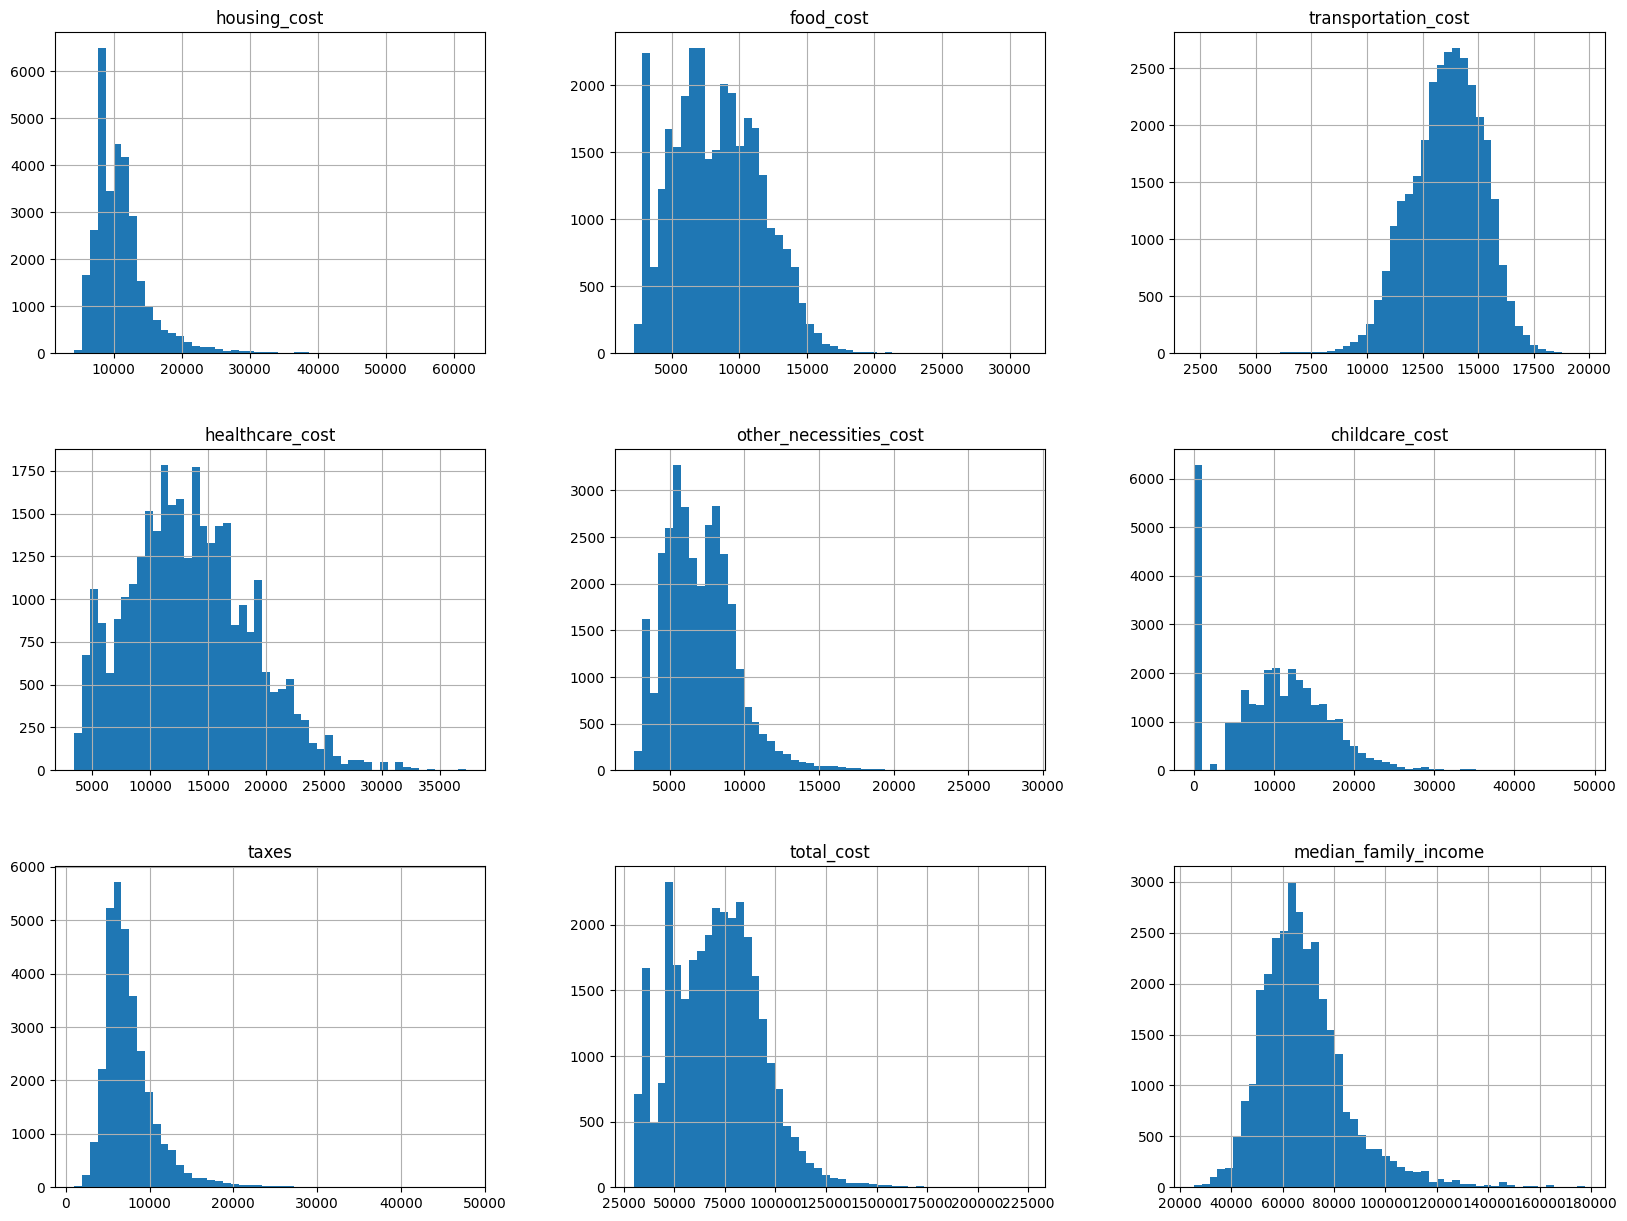

In [31]:
# Histograms for distribution
data_cleaned.hist(bins=50, figsize=(20,15))
plt.show()

<ipython-input-32-dccdba091d51>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



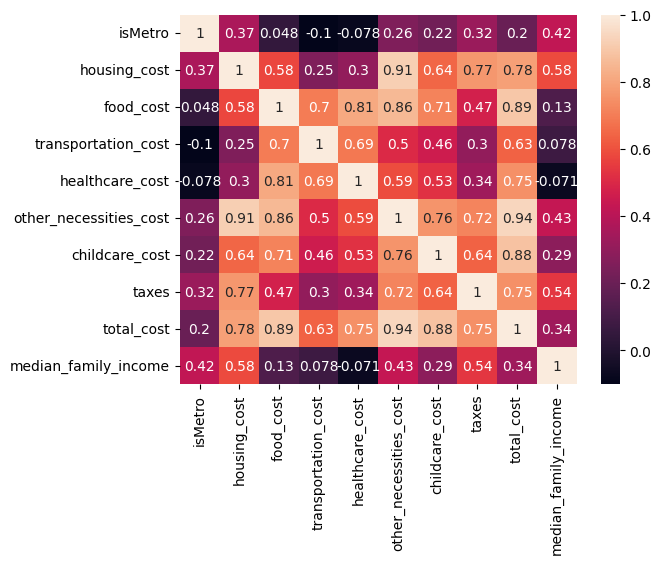

In [32]:
# Correlation matrix
correlation_matrix = data_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [34]:
# One-hot encoding
data_encoded = pd.get_dummies(data_cleaned, columns=['state', 'isMetro', 'areaname', 'county'])

data_encoded

,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,...,county_Yoakum County,county_Yolo County,county_York County,county_Young County,county_Yuba County,county_Yukon-Koyukuk Census Area,county_Yuma County,county_Zapata County,county_Zavala County,county_Ziebach County
0,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062,...,0,0,0,0,0,0,0,0,0,0
1,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062,...,0,0,0,0,0,0,0,0,0,0
2,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062,...,0,0,0,0,0,0,0,0,0,0
3,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062,...,0,0,0,0,0,0,0,0,0,0
4,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31425,2p0c,8316.00000,6010.65672,14790.36240,14466.55920,5191.11288,0.0000,6640.77324,55415.4672,80177.656250,...,0,0,0,0,0,0,0,0,0,0
31426,2p1c,10956.00000,7480.86696,15611.58600,18086.24160,6680.40384,8675.8770,7933.21068,75424.1832,80177.656250,...,0,0,0,0,0,0,0,0,0,0
31427,2p2c,10956.00000,9474.35748,16163.90280,21705.92280,7402.72416,21207.6984,9502.56228,96413.1684,80177.656250,...,0,0,0,0,0,0,0,0,0,0
31428,2p3c,13632.00000,11567.46972,17118.38400,25325.60400,9130.76148,25063.6440,11456.36724,113294.2260,80177.656250,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# Load dataset
iris = load_iris()
X = iris.data  # features
y = iris.target  # target variable

In [41]:
#compress the data by elimnating non numerical columns
data_compressed = data_cleaned.drop(columns=['state', 'isMetro', 'areaname', 'county', 'family_member_count'])
data_compressed

,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
0,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062
1,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062
2,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062
3,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062
4,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062
...,...,...,...,...,...,...,...,...,...
31425,8316.00000,6010.65672,14790.36240,14466.55920,5191.11288,0.0000,6640.77324,55415.4672,80177.656250
31426,10956.00000,7480.86696,15611.58600,18086.24160,6680.40384,8675.8770,7933.21068,75424.1832,80177.656250
31427,10956.00000,9474.35748,16163.90280,21705.92280,7402.72416,21207.6984,9502.56228,96413.1684,80177.656250
31428,13632.00000,11567.46972,17118.38400,25325.60400,9130.76148,25063.6440,11456.36724,113294.2260,80177.656250


In [43]:
# Separate features and target
X = data_compressed.drop('housing_cost', axis=1)
y = data_compressed['taxes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

#excluding the target column for scaling
features = data_compressed.drop('housing_cost', axis=1)
scaled_features = scaler.fit_transform(features)

# Replace original features with scaled features
data_compressed.loc[:, features.columns] = scaled_features

In [ ]:
# Drop rows with missing values
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]

# Convert y_train to a categorical variable
y_train = preprocessing.LabelEncoder().fit_transform(y_train)

# Now fit the model
model = LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
# Drop rows with missing values
X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]

# Predict and evaluate the model
y_pred = model.predict(X_test)


In [18]:
y_test = y_test.round()

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)

mse

In [22]:
import plotly.express as px

# Create a scatter plot on the map with a legend
fig = px.scatter_mapbox(
    data_cleaned,
    location='reclat',
    lon='reclong',
    color='mass',
    zoom=3,
    height=2000,
    color_continuous_scale="Viridis",  # Choose the color scale you prefer
    color_continuous_midpoint=data_compressed['mass'].mean(),  # Set midpoint for color scale
    labels={'mass': 'Meteor Mass'},  # Set label for legend
)

# Set the mapbox style
fig.update_layout(mapbox_style="open-street-map")

# Add legend title
fig.update_layout(coloraxis_colorbar=dict(title='Meteor Mass'))

# Show the figure
fig.show()